In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

from scipy.io import loadmat, savemat

In [3]:
# Read the Excel file
file_name = 'Data_4_Import_REST.xlsx'  # Replace with your file path
excel_sheet_name = 'Depression Rest'
file_path = os.path.join("Depression_Study", "depression_data", file_name)
df_raw = pd.read_excel(file_path, sheet_name=excel_sheet_name)

# Extract values from the first column into two arrays
healthy_sample = df_raw[df_raw.iloc[:, 1] == 99].iloc[:, 0].tolist()
depressed_sample = df_raw[df_raw.iloc[:, 1] != 99].iloc[:, 0].tolist()

# Print the results
print("Healthy sample:", healthy_sample)
print("Depressed sample:", depressed_sample)
print()
print(df_raw)

Healthy sample: [507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 560, 562, 563, 564, 566, 568, 569, 570, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 588, 589, 590, 593, 596, 599, 600, 601, 603, 609, 611, 612, 615, 617, 619, 620, 621, 623]
Depressed sample: [558, 559, 561, 565, 567, 571, 572, 586, 587, 591, 592, 594, 595, 597, 598, 602, 604, 605, 606, 607, 608, 610, 613, 614, 616, 618, 622, 624, 625, 626, 627, 628]

      id  MDD                         MDD_note  HamD  sex   age   BDI  \
0    507   99                              NaN   NaN  1.0  19.0   0.0   
1    508   99                              NaN   NaN  1.0  18.0   4.0   
2    509   99                              NaN   NaN  1.0  18.0   7.0   
3    510   99                              NaN   NaN  1.0  19

In [4]:
# Load CSER values from MAT file
cser_values = loadmat("cser_values.mat")

# Extract field names from cser_open and cser_closed
field_names_open = [int(name[1:]) for name in cser_values['cser_open'].dtype.names]
field_names_closed = [int(name[1:]) for name in cser_values['cser_closed'].dtype.names]

# Extract values from the CSER data
cser_open = np.array([value[0][0] for sublist in cser_values['cser_open'][0] for value in sublist])
cser_closed = np.array([value[0][0] for sublist in cser_values['cser_closed'][0] for value in sublist])

# Extract band values into separate list for each band
cser_band_open = [np.array([value[0][i] for sublist in cser_values['cser_band_open'][0] for value in sublist]) for i in range(5)]
cser_band_closed = [np.array([value[0][i] for sublist in cser_values['cser_band_closed'][0] for value in sublist]) for i in range(5)]

# Extract CSER from the for each of the 60 sources
cser_source_open = [np.array([value[0][i] for sublist in cser_values['cser_source_open'][0] for value in sublist]) for i in range(60)]
cser_source_closed = [np.array([value[0][i] for sublist in cser_values['cser_source_closed'][0] for value in sublist]) for i in range(60)]

# Extract CSER from the for each of the 60 sources
cser_source_band_open = np.array([[np.array([value[j][i] for sublist in cser_values['cser_source_band_open'][0] for value in sublist]) for i in range(60)] for j in range(5)])
cser_source_band_closed = np.array([[np.array([value[j][i] for sublist in cser_values['cser_source_band_closed'][0] for value in sublist]) for i in range(60)] for j in range(5)])
# i source x j band

# print("CSER Open:", cser_open)
# print("CSER Closed:", cser_closed)

# print("CSER Band Open:", cser_band_open)
# print("CSER Band Closed:", cser_band_closed)

In [ ]:
# Load CSER values from MAT file
cser_values = loadmat("cser_values.mat")

# Extract field names from cser_open and cser_closed
field_names_open = [int(name[1:]) for name in cser_values['cser_open'].dtype.names]
field_names_closed = [int(name[1:]) for name in cser_values['cser_closed'].dtype.names]

# Extract values from the CSER data
cser_open = np.array([value[0][0] for sublist in cser_values['cser_open'][0] for value in sublist])
cser_closed = np.array([value[0][0] for sublist in cser_values['cser_closed'][0] for value in sublist])

# Extract band values into separate list for each band
cser_band_open = [np.array([value[0][i] for sublist in cser_values['cser_band_open'][0] for value in sublist]) for i in range(5)]
cser_band_closed = [np.array([value[0][i] for sublist in cser_values['cser_band_closed'][0] for value in sublist]) for i in range(5)]

# Extract CSER from the for each of the 60 sources
cser_source_open = [np.array([value[0][i] for sublist in cser_values['cser_source_open'][0] for value in sublist]) for i in range(60)]
cser_source_closed = [np.array([value[0][i] for sublist in cser_values['cser_source_closed'][0] for value in sublist]) for i in range(60)]

# Extract CSER from the for each of the 60 sources
cser_source_band_open = np.array([[np.array([value[j][i] for sublist in cser_values['cser_source_band_open'][0] for value in sublist]) for i in range(60)] for j in range(5)])
cser_source_band_closed = np.array([[np.array([value[j][i] for sublist in cser_values['cser_source_band_closed'][0] for value in sublist]) for i in range(60)] for j in range(5)])
# i source x j band

# print(cser_values['cser_open'])

[[(array([[-2.51923874]]), array([[-2.39767658]]), array([[-2.66542143]]), array([[-2.77834531]]), array([[-2.89713882]]), array([[-2.78114783]]), array([[-2.72392061]]), array([[-2.8066545]]), array([[-2.76420234]]), array([[-2.80091709]]), array([[-2.56973536]]), array([[-2.9778803]]), array([[-2.84240651]]), array([[-2.79059082]]), array([[-2.39710559]]), array([[-2.66443994]]), array([[-2.3992163]]), array([[-2.7828892]]), array([[-2.62197219]]), array([[-3.086138]]), array([[-2.63310562]]), array([[-2.91663486]]), array([[-2.5726619]]), array([[-3.11470623]]), array([[-2.99705357]]), array([[-2.78122043]]), array([[-3.34444703]]), array([[-2.98392789]]), array([[1.89139304]]), array([[-2.62030335]]), array([[-2.81788592]]), array([[-3.12243585]]), array([[-2.84267188]]), array([[-2.92562246]]), array([[-2.76716306]]), array([[-2.75934774]]), array([[-2.75011645]]), array([[-2.8303592]]), array([[-2.81142449]]), array([[-2.63384346]]), array([[-2.77833924]]), array([[-3.00300437]])

In [ ]:
# print(df_raw.columns.tolist())
df = df_raw.copy()
df = df.drop(columns=['MDD_note', 'HamD'])
# print(df.columns.tolist())

missing_ids_open = set(df['id']) - set(field_names_open)
df = df[~df['id'].isin(missing_ids_open)]

df['eyes'] = 'open'
df['area'] = 'brain'
df['band'] = 'broadband'
df['CSER'] = np.nan

df['depressed'] = df.iloc[:, 1].apply(lambda x: 1 if x != 99 else 0)

# Reorder columns: insert ['eyes', 'area', 'band', 'CSER'] after 'id'
cols = df.columns.tolist()
insert_cols = ['eyes', 'area', 'band', 'CSER']
# Remove if already present to avoid duplication
for c in insert_cols:
    if c in cols:
        cols.remove(c)
id_idx = cols.index('id')
new_cols = cols[:id_idx+1] + insert_cols + cols[id_idx+1:]
df = df[new_cols]

print(df.columns.tolist())
print()

df_copy = df.copy()

print("DF Shape:", df.shape)

# OPEN / BRAIN / BROADBAND
for i, row in df.iterrows():
    id_value = row['id']
    if id_value in field_names_open:
        df.at[i, 'CSER'] = cser_open[field_names_open.index(id_value)]

print("DF Shape after inserting [open / brain / broadband]:", df.shape)

# CLOSED / BRAIN / BROADBAND
df_closed = df_copy.copy()
df_closed['eyes'] = 'closed'
df_closed['area'] = 'brain'
df_closed['band'] = 'broadband'
# Add CSER values for closed eyes
for i, row in df_closed.iterrows():
    id_value = row['id']
    if id_value in field_names_closed:
        df_closed.at[i, 'CSER'] = cser_closed[field_names_closed.index(id_value)]
df = pd.concat([df, df_closed], ignore_index=True)

print("DF Shape after inserting [closed / brain / broadband]:", df.shape)

# open / brain / 1_4, 4_8, 8_12, 12_30, 30_100
band_names = ["1-4","4-8","8-12","12-30","30-100"]
for i, band in enumerate(band_names):
    df_band = df_copy.copy()
    df_band['eyes'] = 'open'
    df_band['area'] = 'brain'
    df_band['band'] = band
    for j, row in df_band.iterrows():
        id_value = row['id']
        if id_value in field_names_open:
            data_index = field_names_open.index(id_value)
            df_band.at[j, 'CSER'] = cser_band_open[i][data_index]
    df = pd.concat([df, df_band], ignore_index=True)

print("DF Shape after inserting [open / brain / 1_4, 4_8, 8_12, 12_30, 30_100]:", df.shape)

# closed / brain / 1_4, 4_8, 8_12, 12_30, 30_100
for i, band in enumerate(band_names):
    df_band = df_copy.copy()
    df_band['eyes'] = 'closed'
    df_band['area'] = 'brain'
    df_band['band'] = band
    for j, row in df_band.iterrows():
        id_value = row['id']
        if id_value in field_names_closed:
            data_index = field_names_closed.index(id_value)
            df_band.at[j, 'CSER'] = cser_band_closed[i][data_index]
    df = pd.concat([df, df_band], ignore_index=True)

print("DF Shape after inserting [closed / brain / 1_4, 4_8, 8_12, 12_30, 30_100]:", df.shape)

# open / src01, src02, ..., src60 / broadband
for i in range(60):
    df_source = df_copy.copy()
    df_source['eyes'] = 'open'
    df_source['area'] = f'src{i+1:02d}'
    df_source['band'] = 'broadband'
    for j, row in df_source.iterrows():
        id_value = row['id']
        if id_value in field_names_open:
            data_index = field_names_open.index(id_value)
            df_source.at[j, 'CSER'] = cser_source_open[i][data_index]
    df = pd.concat([df, df_source], ignore_index=True)

print("DF Shape after inserting [open / src01, src02, ..., src60 / broadband]:", df.shape)

# closed / src01, src02, ..., src60 / broadband
for i in range(60):
    df_source = df_copy.copy()
    df_source['eyes'] = 'closed'
    df_source['area'] = f'src{i+1:02d}'
    df_source['band'] = 'broadband'
    for j, row in df_source.iterrows():
        id_value = row['id']
        if id_value in field_names_closed:
            data_index = field_names_closed.index(id_value)
            df_source.at[j, 'CSER'] = cser_source_closed[i][data_index]
    df = pd.concat([df, df_source], ignore_index=True)

print("DF Shape after inserting [closed / src01, src02, ..., src60 / broadband]:", df.shape)

# open / src01, src02, ..., src60 / 1_4, 4_8, 8_12, 12_30, 30_100
for i in range(60):
    for j, band in enumerate(band_names):
        df_source_band = df_copy.copy()
        df_source_band['eyes'] = 'open'
        df_source_band['area'] = f'src{i+1:02d}'
        df_source_band['band'] = band
        for k, row in df_source_band.iterrows():
            id_value = row['id']
            if id_value in field_names_open:
                data_index = field_names_open.index(id_value)
                df_source_band.at[k, 'CSER'] = cser_source_band_open[j][i][data_index]
        df = pd.concat([df, df_source_band], ignore_index=True)

print("DF Shape after inserting [open / src01, src02, ..., src60 / 1_4, 4_8, 8_12, 12_30, 30_100]:", df.shape)

# closed / src01, src02, ..., src60 / 1_4, 4_8, 8_12, 12_30, 30_100
for i in range(60):
    for j, band in enumerate(band_names):
        df_source_band = df_copy.copy()
        df_source_band['eyes'] = 'closed'
        df_source_band['area'] = f'src{i+1:02d}'
        df_source_band['band'] = band
        for k, row in df_source_band.iterrows():
            id_value = row['id']
            if id_value in field_names_closed:
                data_index = field_names_closed.index(id_value)
                df_source_band.at[k, 'CSER'] = cser_source_band_closed[j][i][data_index]
        df = pd.concat([df, df_source_band], ignore_index=True)

print("DF Shape after inserting [closed / src01, src02, ..., src60 / 1_4, 4_8, 8_12, 12_30, 30_100]:", df.shape)

# open, closed / frontal, occipital, parietal, sensorimotor, temporal / broadband, 1_4, 4_8, 8_12, 12_30, 30_100
region_map = {
    'frontal': [f'src{i:02d}' for i in range(3, 17)] + [f'src{i:02d}' for i in range(19, 25)],
    'occipital': [f'src{i:02d}' for i in range(25, 37)],
    'parietal': [f'src{i:02d}' for i in range(39, 51)],
    'sensorimotor': [f'src{i:02d}' for i in [1, 2, 17, 18, 37, 38]],
    'temporal': [f'src{i:02d}' for i in range(51, 61)]
}

def map_region(area):
    for region, sources in region_map.items():
        if area in sources:
            return region
    return area

df_avg = df[df['area'] != 'brain'].copy()
df_avg['area'] = df_avg['area'].apply(map_region)
group_cols = ['id', 'eyes', 'area', 'band']
agg_dict = {col: 'first' for col in df_avg.columns if col not in group_cols + ['CSER']}
agg_dict['CSER'] = 'mean'
df_avg = df_avg.groupby(group_cols, as_index=False).agg(agg_dict)
df = pd.concat([df, df_avg], ignore_index=True)

print("DF Shape after inserting [open, closed / frontal, ..., temporal / broadband, 1_4, ..., 30_100]:", df.shape)

# open / brain, frontal, ..., src60 / 1_12
df_temp = df.copy()
df_temp = df_temp[~df_temp['band'].isin(['broadband', '12_30', '30_100'])]
df_temp['band'] = '1-12'

group_cols = ['id', 'eyes', 'area', 'band']
agg_dict = {col: 'first' for col in df_temp.columns if col not in group_cols + ['CSER']}
agg_dict['CSER'] = 'sum'
df_temp = df_temp.groupby(group_cols, as_index=False).agg(agg_dict)
df = pd.concat([df, df_temp], ignore_index=True)

print("DF Shape after inserting [open / brain, frontal, ..., src60 / 1_12]:", df.shape)

df = df.sort_values(by=['id', 'eyes', 'area', 'band']).reset_index(drop=True)
print()
print(df)

['id', 'eyes', 'area', 'band', 'CSER', 'MDD', 'sex', 'age', 'BDI', 'BDI_Anh', 'BDI_Mel', 'TAI', 'depressed']

DF Shape: (119, 13)
DF Shape after inserting [open / brain / broadband]: (119, 13)
DF Shape after inserting [closed / brain / broadband]: (238, 13)
DF Shape after inserting [open / brain / 1_4, 4_8, 8_12, 12_30, 30_100]: (833, 13)
DF Shape after inserting [closed / brain / 1_4, 4_8, 8_12, 12_30, 30_100]: (1428, 13)
DF Shape after inserting [open / src01, src02, ..., src60 / broadband]: (8568, 13)
DF Shape after inserting [closed / src01, src02, ..., src60 / broadband]: (15708, 13)
DF Shape after inserting [open / src01, src02, ..., src60 / 1_4, 4_8, 8_12, 12_30, 30_100]: (51408, 13)
DF Shape after inserting [closed / src01, src02, ..., src60 / 1_4, 4_8, 8_12, 12_30, 30_100]: (87108, 13)
DF Shape after inserting [open, closed / frontal, ..., temporal / broadband, 1_4, ..., 30_100]: (94248, 13)
DF Shape after inserting [open / brain, frontal, ..., src60 / 1_12]: (109956, 13)

   

In [7]:
# List outliers beyond 75th percentile and below 25th percentile
def identify_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return series[(series < lower_bound) | (series > upper_bound)]
outliers = identify_outliers(df['CSER'])
print("\nOutliers in CSER values:")
print(outliers)

# # Drop outliers from the DataFrame if they exist
outlier_ids = ['527','535']
ids_in_df = df['id'].astype(str).isin(outlier_ids)
if ids_in_df.any():
    df = df[~ids_in_df]
print("\nDropped outliers with IDs:", outlier_ids)
print("DF Shape after dropping outliers:", df.shape)


Outliers in CSER values:
27       -3.495830
34       -3.362662
41       -3.540515
48       -3.487562
55       -3.201105
            ...   
109843   -3.787678
109850   -3.184133
109857   -3.083440
109871   -3.258471
109878   -3.095916
Name: CSER, Length: 4357, dtype: float64

Dropped outliers with IDs: ['527', '535']
DF Shape after dropping outliers: (108108, 13)


In [8]:
def permutation_test(data1, data2, num_permutations=10000):
    """Perform a permutation test to compare two independent samples."""
    observed_diff = np.mean(data1) - np.mean(data2)
    combined = np.concatenate([data1, data2])
    count = 0

    for _ in range(num_permutations):
        np.random.shuffle(combined)
        new_data1 = combined[:len(data1)]
        new_data2 = combined[len(data1):]
        new_diff = np.mean(new_data1) - np.mean(new_data2)
        if abs(new_diff) >= abs(observed_diff):
            count += 1

    p_value = count / num_permutations
    return observed_diff, p_value

In [9]:
# from scipy.stats import ttest_ind
# # Perform t-tests for CSER values
# i = 3
# open_condition = f'cser_band_{i}_open'
# closed_condition = f'cser_band_{i}_closed'

# t_stat_open, p_value_open = ttest_ind(df[df['depressed'] == 0][open_condition], df[df['depressed'] == 1][open_condition], nan_policy='omit', equal_var=False)
# t_stat_closed, p_value_closed = ttest_ind(df[df['depressed'] == 0][closed_condition], df[df['depressed'] == 1][closed_condition], nan_policy='omit', equal_var=False)

# stat_open, p_value_open_perm = permutation_test(df[df['depressed'] == 0][open_condition].dropna().values, df[df['depressed'] == 1][open_condition].dropna().values)
# stat_closed, p_value_closed_perm = permutation_test(df[df['depressed'] == 0][closed_condition].dropna().values, df[df['depressed'] == 1][closed_condition].dropna().values)

# print("\nPermutation test results for CSER Open:")
# print("Observed difference:", stat_open, "P-value:", p_value_open_perm)
# print("\nPermutation test results for CSER Closed:")
# print("Observed difference:", stat_closed, "P-value:", p_value_closed_perm)

# print("\nT-test results for CSER Open:")
# print("T-statistic:", t_stat_open, "P-value:", p_value_open)
# print("\nT-test results for CSER Closed:")
# print("T-statistic:", t_stat_closed, "P-value:", p_value_closed)

# sns.boxplot(x='depressed', y=open_condition, data=df)
# sns.boxplot(x='depressed', y=closed_condition, data=df)

In [65]:
df['sex'] = df['sex'] - 1

In [66]:
df['intercept'] = 1
df['age_squared'] = df['age'] ** 2

# Perform regression analysis for each combination of eyes, area, and band
variables = ['intercept', 'depressed', 'BDI', 'BDI_Anh', 'BDI_Mel', 'TAI', 'sex', 'age', 'age_squared']
rlm_results = pd.DataFrame(columns=['eyes', 'area', 'band', 'variable', 'p_value', 't_value', 'p_significant'])

for eyes in ['open', 'closed']:
    for area in df['area'].unique():
        for band in df['band'].unique():
            # Run sm.RLM for each subset of the DataFrame
            subset = df[(df['eyes'] == eyes) & (df['area'] == area) & (df['band'] == band)]
            if subset.empty:
                continue
            model = sm.RLM(subset['CSER'], subset[variables], missing='drop', M=sm.robust.norms.HuberT())
            results = model.fit()
            # print(results.summary())
            for var in variables[1:]:
                significant = results.pvalues[var] <= 0.05
                new_permutation = pd.DataFrame([{
                    'eyes': eyes,
                    'area': area,
                    'band': band,
                    'variable': var,
                    'p_value': results.pvalues[var],
                    't_value': results.tvalues[var],
                    'p_significant': significant
                }])
                rlm_results = pd.concat([rlm_results, new_permutation], ignore_index=True)

print(rlm_results)

C:\Users\lukad\AppData\Local\Temp\ipykernel_14268\1682592204.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  rlm_results = pd.concat([rlm_results, new_permutation], ignore_index=True)


        eyes      area       band     variable   p_value   t_value  \
0       open     brain       1-12    depressed  0.561174  0.581099   
1       open     brain       1-12          BDI  0.044871 -2.005864   
2       open     brain       1-12      BDI_Anh  0.999707  0.000368   
3       open     brain       1-12      BDI_Mel  0.255328  1.137503   
4       open     brain       1-12          TAI  0.154567  1.423582   
...      ...       ...        ...          ...       ...       ...   
7387  closed  temporal  broadband      BDI_Mel  0.100869  1.640655   
7388  closed  temporal  broadband          TAI  0.022183  2.287219   
7389  closed  temporal  broadband          sex  0.168272 -1.377776   
7390  closed  temporal  broadband          age  0.594087 -0.532922   
7391  closed  temporal  broadband  age_squared  0.562956  0.578456   

     p_significant  
0            False  
1             True  
2            False  
3            False  
4            False  
...            ...  
7387        

C:\Users\lukad\AppData\Local\Temp\ipykernel_14268\73316200.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=rlm_results[(rlm_results['eyes'] == 'closed') & (rlm_results['variable'] == 'BDI_Anh') & (rlm_results['area'].isin(region_map.keys()))],


Text(0.5, 1.0, 'RLM t-values for Closed Eyes by Area and Variable')

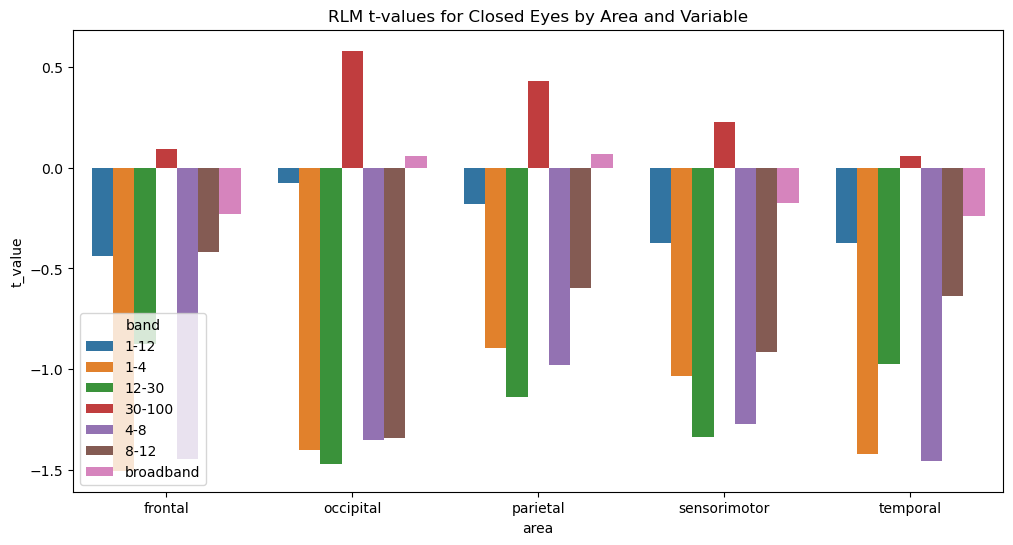

In [72]:
# Create a bar plot with x axis 'frontal', 'occipital', 'parietal', 'sensorimotor', 'temporal' and y axis t_value for each band and eyes closed
plt.figure(figsize=(12, 6))
sns.barplot(data=rlm_results[(rlm_results['eyes'] == 'closed') & (rlm_results['variable'] == 'BDI_Anh') & (rlm_results['area'].isin(region_map.keys()))],
            x='area', y='t_value', hue='band', ci=None)
plt.title('RLM t-values for Closed Eyes by Area and Variable')

C:\Users\lukad\AppData\Local\Temp\ipykernel_14268\2863351169.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=rlm_results[(rlm_results['eyes'] == 'open') & (rlm_results['variable'] == 'BDI_Anh') & (rlm_results['area'].isin(region_map.keys()))],


Text(0.5, 1.0, 'RLM t-values for Open Eyes by Area and Variable')

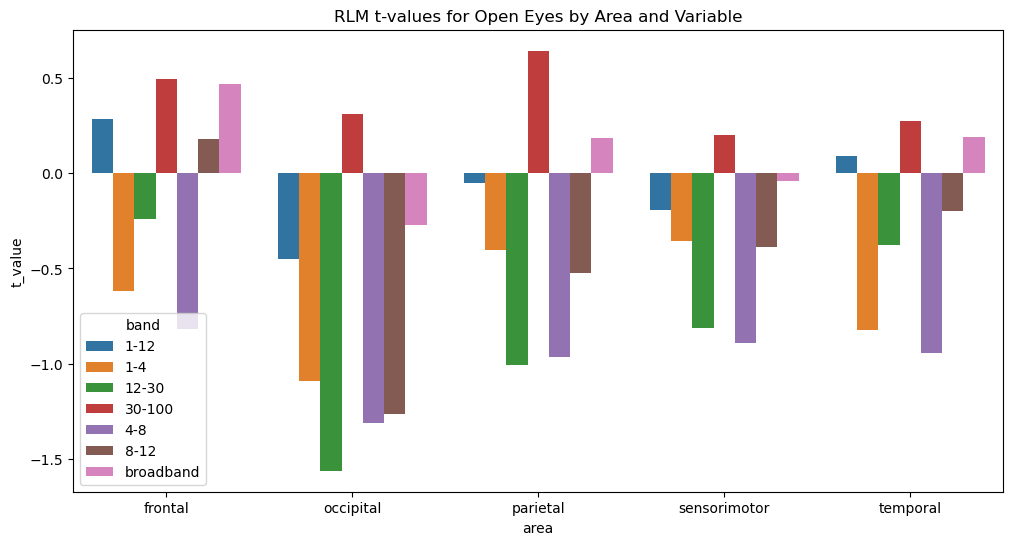

In [71]:
plt.figure(figsize=(12, 6))
sns.barplot(data=rlm_results[(rlm_results['eyes'] == 'open') & (rlm_results['variable'] == 'BDI_Anh') & (rlm_results['area'].isin(region_map.keys()))],
            x='area', y='t_value', hue='band', ci=None)
plt.title('RLM t-values for Open Eyes by Area and Variable')

In [ ]:
# Generate a scatter

In [43]:
significant_results = pd.DataFrame(columns=['variable', 'value', 'count', 'percentage'])

def count_significant_results(df, column):
    counts = df[column].value_counts()
    total = len(df)
    percentages = (counts / total) * 100
    percentages = percentages.round(2)
    return counts, percentages

for var in ['eyes', 'area', 'band']:
    counts, percentages = count_significant_results(rlm_results[rlm_results['significant']], var)

    counts_df = counts.to_frame(name='count')
    percentages_df = percentages.to_frame(name='percentage')
    merged_df = pd.merge(counts_df, percentages_df, left_index=True, right_index=True)

    print(merged_df, "\n")
    
    merged_df = merged_df.reset_index().rename(columns={var: 'value'})
    merged_df['variable'] = var
    significant_results = pd.concat([significant_results, merged_df], ignore_index=True)

print(significant_results)


        count  percentage
eyes                     
closed    809       61.24
open      512       38.76 

              count  percentage
area                           
src51            34        2.57
sensorimotor     34        2.57
src02            30        2.27
src18            29        2.20
brain            28        2.12
...             ...         ...
src36            10        0.76
src59             9        0.68
src05             8        0.61
src60             8        0.61
src09             6        0.45

[66 rows x 2 columns] 

           count  percentage
band                        
12-30        264       19.98
4-8          261       19.76
8-12         213       16.12
1-12         171       12.94
1-4          169       12.79
broadband    136       10.30
30-100       107        8.10 

   variable         value count  percentage
0      eyes        closed   809       61.24
1      eyes          open   512       38.76
2      area         src51    34        2.57
3      area  s

C:\Users\lukad\AppData\Local\Temp\ipykernel_14268\3238816695.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  significant_results = pd.concat([significant_results, merged_df], ignore_index=True)


C:\Users\lukad\AppData\Local\Temp\ipykernel_14268\2211533162.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.hist(df[df['eyes'] == 'open'][df['area'] == 'brain'][df['band'] == 'broadband']['CSER'].dropna(), bins=30, alpha=0.5, color='blue', label='CSER Open')
C:\Users\lukad\AppData\Local\Temp\ipykernel_14268\2211533162.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.hist(df[df['eyes'] == 'open'][df['area'] == 'brain'][df['band'] == 'broadband']['CSER'].dropna(), bins=30, alpha=0.5, color='blue', label='CSER Open')
C:\Users\lukad\AppData\Local\Temp\ipykernel_14268\2211533162.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.hist(df[df['eyes'] == 'closed'][df['area'] == 'brain'][df['band'] == 'broadband']['CSER'].dropna(), bins=30, alpha=0.5, color='red', label='CSER Closed')
C:\Users\lukad\AppData\Local\Temp\ipykernel_14268\2211533162.py:3: UserWarning: Boolean Series ke

(array([ 1.,  0.,  0.,  1.,  2.,  1.,  1.,  2.,  3.,  8.,  4., 10.,  9.,
        11.,  7., 10., 15.,  7.,  6.,  9.,  2.,  4.,  0.,  0.,  2.,  1.,
         1.,  0.,  1.,  1.]),
 array([-3.35364316, -3.30807614, -3.26250912, -3.2169421 , -3.17137507,
        -3.12580805, -3.08024103, -3.03467401, -2.98910699, -2.94353996,
        -2.89797294, -2.85240592, -2.8068389 , -2.76127188, -2.71570485,
        -2.67013783, -2.62457081, -2.57900379, -2.53343677, -2.48786974,
        -2.44230272, -2.3967357 , -2.35116868, -2.30560166, -2.26003463,
        -2.21446761, -2.16890059, -2.12333357, -2.07776655, -2.03219952,
        -1.9866325 ]),
 <BarContainer object of 30 artists>)

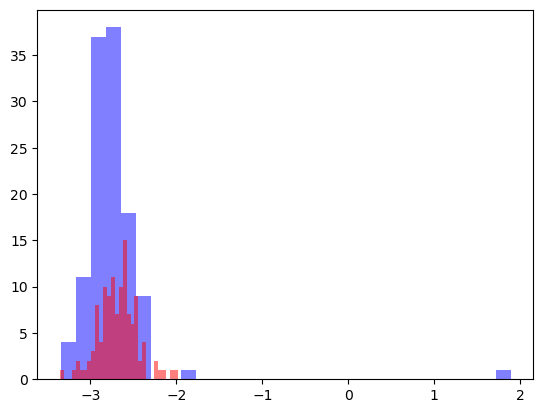

In [73]:
# Plot the distribution of CSER values with eyes set to 'open' and 'closed'
plt.hist(df[df['eyes'] == 'open'][df['area'] == 'brain'][df['band'] == 'broadband']['CSER'].dropna(), bins=30, alpha=0.5, color='blue', label='CSER Open')
plt.hist(df[df['eyes'] == 'closed'][df['area'] == 'brain'][df['band'] == 'broadband']['CSER'].dropna(), bins=30, alpha=0.5, color='red', label='CSER Closed')

# Plot the distribution of CSER values with eyes set to 'open' and 'closed'
# plt.hist(df[df['depressed'] == 0]['CSER'].dropna(), bins=30, alpha=0.5, color='blue', label='CSER Open')
# plt.hist(df[df['depressed'] == 1]['CSER'].dropna(), bins=30, alpha=0.5, color='red', label='CSER Closed')

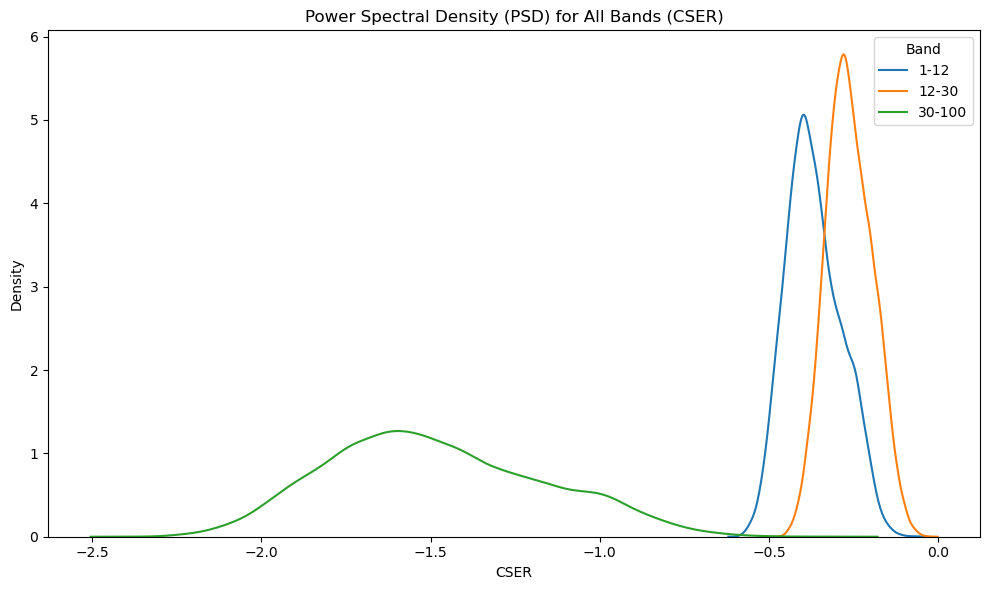

In [13]:
# Plot power spectral density (PSD) for all bands using CSER values

# bands = df['band'].unique()
# bands = [b for b in bands if b not in ['broadband', '1-12']]
bands = []
# bands += ['broadband']
# bands += ['1-4', '4-8', '8-12']
bands += ['1-12']
bands += ['12-30']
bands += ['30-100']

plt.figure(figsize=(10, 6))
for band in bands:
    band_data = df[df['band'] == band]['CSER'].dropna()
    if not band_data.empty:
        sns.kdeplot(band_data, label=band)

plt.title('Power Spectral Density (PSD) for All Bands (CSER)')
plt.xlabel('CSER')
plt.ylabel('Density')
plt.legend(title='Band')
plt.tight_layout()
plt.show()